𝙎𝙖𝙧𝙘𝙖𝙨𝙢 𝘿𝙚𝙩𝙚𝙘𝙩𝙞𝙤𝙣 𝙪𝙨𝙞𝙣𝙜 𝙆𝙚𝙧𝙖𝙨 𝙎𝙚𝙦𝙪𝙚𝙣𝙩𝙞𝙖𝙡 𝙡𝙚𝙖𝙧𝙣𝙞𝙣𝙜

In [4]:
# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

Reading data which is in json format

In [5]:
data = pd.read_json("Sarcasm_Headlines_Dataset.json" , lines=True)

In [6]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
df  = data.drop(['article_link'], axis=1)

Using tokenizer to convert headline words into tokens with unique indices

In [11]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(df.headline.values)
word_index = tokenizer.word_index


Preserving sequence using text_to_sequence function and performing padding to make each nd array of same length

In [14]:
sequences = tokenizer.texts_to_sequences(df.headline.values)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[  308 15115   679  3337  2298    48   382  2576 15116     6  2577  8434
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
(26709, 40)


In [13]:
len_each_sublist = [len(sublist) for sublist in sequences]
max(len_each_sublist)

40

Train_test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(padded, df.is_sarcastic, test_size = 0.2, random_state = 1)

Building model

In [16]:
EMBEDDING_DIM = 150
VOCAB_SIZE = 30000
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length = X_train.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Setting validation data to test data , to analyze accuracy

In [28]:
num_epochs = 10

history = model.fit(X_train,y_train, epochs=num_epochs,
                    validation_data=(X_test,y_test), verbose=2)
    

Epoch 1/10
668/668 - 54s - loss: 2.2088e-06 - accuracy: 1.0000 - val_loss: 1.8812 - val_accuracy: 0.8190 - 54s/epoch - 81ms/step
Epoch 2/10
668/668 - 70s - loss: 1.7979e-06 - accuracy: 1.0000 - val_loss: 1.9405 - val_accuracy: 0.8205 - 70s/epoch - 104ms/step
Epoch 3/10
668/668 - 62s - loss: 1.3206e-06 - accuracy: 1.0000 - val_loss: 1.9681 - val_accuracy: 0.8197 - 62s/epoch - 92ms/step
Epoch 4/10
668/668 - 60s - loss: 9.7928e-07 - accuracy: 1.0000 - val_loss: 2.0146 - val_accuracy: 0.8199 - 60s/epoch - 90ms/step
Epoch 5/10
668/668 - 61s - loss: 7.2685e-07 - accuracy: 1.0000 - val_loss: 2.0773 - val_accuracy: 0.8214 - 61s/epoch - 91ms/step
Epoch 6/10
668/668 - 54s - loss: 5.2318e-07 - accuracy: 1.0000 - val_loss: 2.1154 - val_accuracy: 0.8203 - 54s/epoch - 80ms/step
Epoch 7/10
668/668 - 50s - loss: 4.3735e-07 - accuracy: 1.0000 - val_loss: 2.1536 - val_accuracy: 0.8203 - 50s/epoch - 75ms/step
Epoch 8/10
668/668 - 65s - loss: 3.4359e-07 - accuracy: 1.0000 - val_loss: 2.2201 - val_accuracy

In [30]:
model_history = pd.DataFrame(history.history)
model_history.index = model_history.index + 1
model_history.reset_index().rename(columns = {"index" : "epochs"})

,epochs,loss,accuracy,val_loss,val_accuracy
0,1,2.208823e-06,1.0,1.881229,0.818982
1,2,1.797852e-06,1.0,1.940488,0.820479
2,3,1.320626e-06,1.0,1.968120,0.819730
3,4,9.792835e-07,1.0,2.014581,0.819918
4,5,7.268476e-07,1.0,2.077326,0.821415
5,6,5.231847e-07,1.0,2.115365,0.820292
6,7,4.373526e-07,1.0,2.153630,0.820292
7,8,3.435914e-07,1.0,2.220076,0.820666
8,9,2.104136e-07,1.0,2.261453,0.820105
9,10,1.536980e-07,1.0,2.285513,0.820854


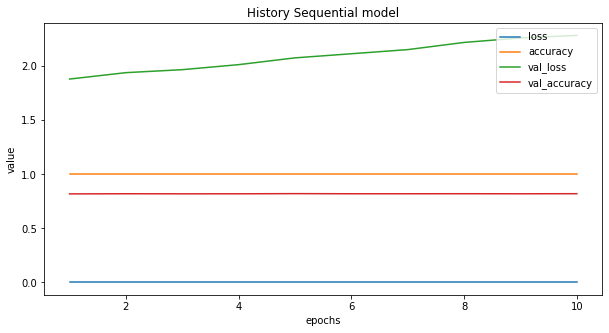

In [33]:
model_history.plot(kind = 'line', figsize = (10,5), xlabel = "epochs", ylabel = "value", title = "History Sequential model")
plt.show()

Classification report and confusion matrix

167/167 [==============================] - 0s 2ms/step
 f1_score: 0.8209114802080176
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3026
           1       0.79      0.80      0.79      2316

    accuracy                           0.82      5342
   macro avg       0.82      0.82      0.82      5342
weighted avg       0.82      0.82      0.82      5342



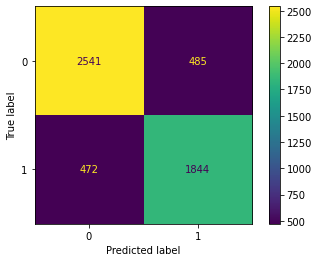

In [34]:
model_notfinal_predict = model.predict(X_test)
model_predict = np.where(model_notfinal_predict > 0.5, 1, 0)
model_f1_score = f1_score(y_test,model_predict, average = 'weighted')
print(f" f1_score: {model_f1_score}")
class_report = classification_report(y_test, model_predict)
print(class_report)
conf = confusion_matrix(y_test, model_predict)
conf_plot = ConfusionMatrixDisplay(conf)
conf_plot.plot()
plt.show()

Checking for custom input

In [29]:
sentence = ["It seems like a thunderstorm is coming",
            "Granny thinks she can dunk the basketball"]
sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, padding='post', maxlen=40)

In [27]:
print(model.predict(padded))

1/1 [==============================] - 0s 117ms/step
[[2.3180359e-13]
 [1.4231399e-05]]


Values predicted close to 0 represent more seriousness and closer to 1 represents sarcasm